In [ ]:
!ls /content/drive/MyDrive/kaggle_bt/Data_analysis_process

happiness  superstore_sales


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot

In [ ]:
# đọc file dữ liệuliệu
data_df = pd.read_excel("/content/drive/MyDrive/kaggle_bt/Data_analysis_process/superstore_sales/Sample - Superstore.xls")
data_df.head(1010)

In [ ]:
data_df.shape

(9994, 21)

In [ ]:
# Thêm cột năm và tháng
data_df['Order Date'] = pd.to_datetime(data_df['Order Date'])
data_df['year'], data_df['month'] = data_df['Order Date'].dt.year, data_df['Order Date'].dt.month
data_df


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,2014-01-23,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028,2014,1
9990,9991,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332,2017,2
9991,9992,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932,2017,2
9992,9993,CA-2017-121258,2017-02-26,2017-03-03,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200,2017,2


# **1. How have profit and sales changed over the years?**

In [ ]:
annual = data_df.groupby('year')['Sales','Profit'].sum()
annual['Profit Rate'] = round(data_df['Profit'] / data_df['Sales'], 3)
annual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Sales,Profit,Profit Rate
year,,,
2014,484247.4981,49543.9741,0.460
2015,470532.5090,61618.6037,0.130
2016,609205.5980,81795.1743,0.362
2017,733215.2552,93439.2696,0.470


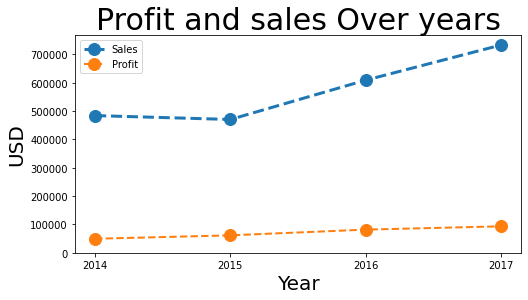

In [ ]:
years = [str(year) for year, sales in annual['Sales'].items()]
plt.figure(figsize=(8, 4))
plt.plot(years, annual['Sales'], marker = 'o', markersize = 12, linewidth = 3, linestyle = 'dashed', label = 'Sales')
plt.plot(years, annual['Profit'],marker = 'o', markersize = 12, linewidth = 2, linestyle = 'dashed', label = 'Profit')
plt.xlabel("Year", fontsize = 20)
plt.ylabel('USD', fontsize = 20)
plt.ylim(ymin = 0)
plt.title('Profit and sales Over years', fontsize = 30)
plt.legend()
# plt.savefig('/content/drive/MyDrive/kaggle_bt/Data_analysis_process/image/{}.png'.format('sales and profit over years'), dpi = 300, bbox_inches = 'tight')
plt.show()

Đây là biểu đồ thể hiện doanh số và lợi nhuận thay đổi qua các năm từ năm 2014-2017. Nhìn chung cả doanh số và lợi nhuận đều tăng.    
Tuy nhiên:
  1. Từ năm 2014-2015 doanh số giảm nhưng lợi nhuận tăng
  2. Từ năm 2015-202017 doanh số tăng nhanh nhưng lợi nhuận tăng ko đáng kể
  
Vì vậy tỷ lệ lợi nhuận cũng tăng giảm theo doanh số theo các năm từ 2015-2017  và 2014-2015


# 2. How do **profit Rate (Profit/Sales)** over years?


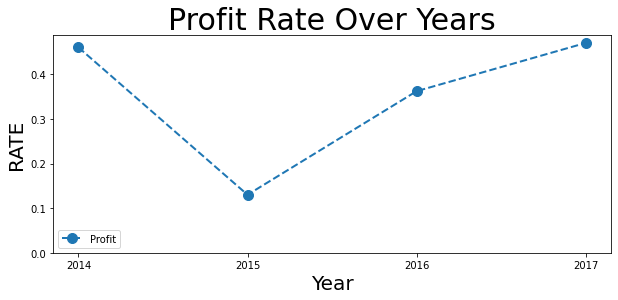

In [ ]:
years = [str(year) for year, sales in annual['Sales'].items()]
plt.figure(figsize=(10,4))
plt.plot(years, annual['Profit Rate'],marker = 'o', markersize = 10, linewidth = 2, linestyle = 'dashed', label = 'Profit')
plt.xlabel("Year", fontsize = 20)
plt.ylabel('RATE', fontsize = 20)
plt.ylim(ymin = 0)
plt.title('Profit Rate Over Years', fontsize = 30)
plt.legend()
# plt.savefig('/content/drive/MyDrive/kaggle_bt/Data_analysis_process/image/{}.png'.format('sales and profit over years'), dpi = 300, bbox_inches = 'tight')
plt.show()

# 3. How do profit and sales change over months in 2017?

In [ ]:
data_2017 = data_df[data_df['year'] == 2017]

data_2017 = data_2017.groupby('month')['Sales','Profit'].sum()
data_2017

data_2017['Profit Rate 2017'] = round(data_2017['Profit'] / data_2017['Sales'], 3)
annual_each_month = data_2017[[ 'Sales', 'Profit', 'Profit Rate 2017']]
annual_each_month

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Sales,Profit,Profit Rate 2017
month,,,
1,43971.3740,7140.4391,0.162
2,20301.1334,1613.8720,0.079
3,58872.3528,14751.8915,0.251
4,36521.5361,933.2900,0.026
5,44261.1102,6342.5828,0.143
6,52981.7257,8223.3357,0.155
7,45264.4160,6952.6212,0.154
8,63120.8880,9040.9557,0.143
9,87866.6520,10991.5556,0.125


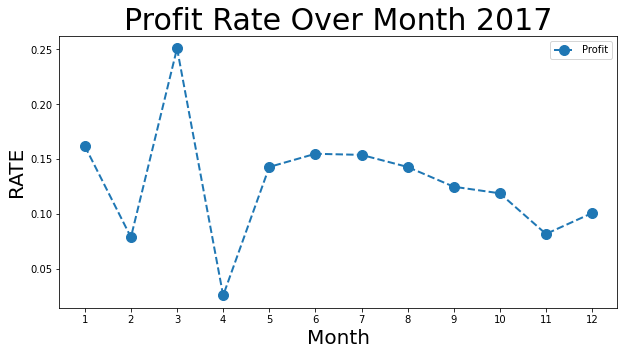

In [ ]:
months = [str(month) for month, sales in annual_each_month['Sales'].items()]
plt.figure(figsize=(10,5))
plt.plot(months, annual_each_month['Profit Rate 2017'], marker = 'o', markersize = 10, linewidth = 2, linestyle = 'dashed', label = 'Profit')
plt.xlabel("Month", fontsize = 20)
plt.ylabel('RATE', fontsize = 20)
plt.title('Profit Rate Over Month 2017', fontsize = 30)
plt.legend()
# plt.savefig('/content/drive/MyDrive/kaggle_bt/Data_analysis_process/image/{}.png'.format('sales and profit over years'), dpi = 300, bbox_inches = 'tight')
plt.show()

Tỷ lệ lợi nhuận trong các tháng của năm 2017:
  1. Biến động mạng qua các tháng từ tháng 1 đến tháng 5
  2. Và bắt đầu giảm nhẹ từ tháng 5 đến tháng 12


#4. Which **states** have the **highest return rates**?

In [75]:
state_df = data_df.groupby('State')['Sales','Profit'].mean().reset_index()
state_df
state_df['cost'] = state_df['Sales'] - state_df['Profit']

state_df['return_rate'] = round((state_df['Sales'] - state_df['cost']) / state_df['cost'], 3)

state_df = state_df.sort_values('return_rate', ascending = 0)
state_df = state_df.iloc[:5 ,:]
state_df



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,State,Sales,Profit,cost,return_rate
7,District of Columbia,286.502000,105.958930,180.543070,0.587
6,Delaware,285.948635,103.930988,182.017648,0.571
21,Minnesota,335.541011,121.608847,213.932164,0.568
17,Maine,158.816250,56.810775,102.005475,0.557
2,Arkansas,194.635500,66.811452,127.824048,0.523


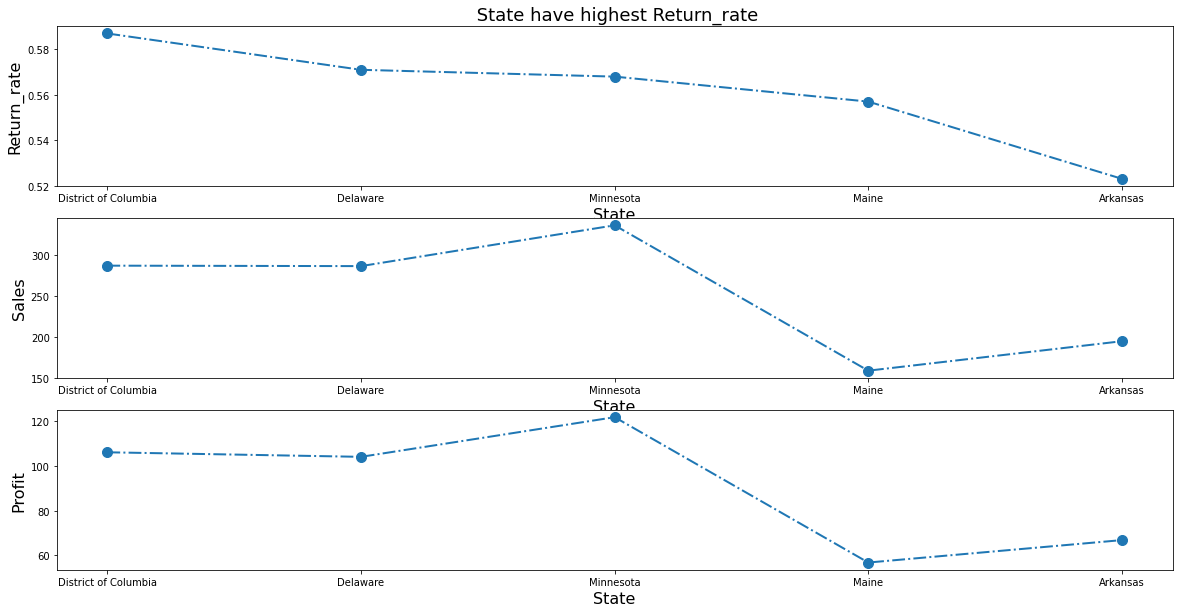

In [74]:
plt.figure(figsize=(20, 10))
plt.subplot(3,1,1)
# plt.figure(figsize=(10, 4))
plt.plot(state_df['State'], state_df['return_rate'], marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('State', fontsize=16)
plt.ylabel('Return_rate', fontsize=16)
plt.title(" State have highest Return_rate", fontsize=18)

plt.subplot(3,1,2)
plt.plot(state_df['State'], state_df['Sales'], marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('State', fontsize=16)
plt.ylabel('Sales', fontsize=16)


plt.subplot(3,1,3)
plt.plot(state_df['State'], state_df['Profit'], marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('State', fontsize=16)
plt.ylabel('Profit', fontsize=16)


plt.show()

# **5. Which categories have the highest return rates?**

In [76]:
cat_df = data_df.groupby(['Category', 'Sub-Category'])[['Sales','Profit']].mean().reset_index()

cat_df['cost'] = cat_df['Sales'] - cat_df['Profit']

cat_df['return_rate'] = round((cat_df['Sales'] - cat_df['cost']) / cat_df['cost'], 3)

cat = cat_df.sort_values('return_rate', ascending = 0)
cat = cat.iloc[:5, :]
cat


,Category,Sub-Category,Sales,Profit,cost,return_rate
9,Office Supplies,Labels,34.303055,15.236962,19.066093,0.799
10,Office Supplies,Paper,57.284092,24.856620,32.427472,0.767
7,Office Supplies,Envelopes,64.867724,27.418019,37.449706,0.732
14,Technology,Copiers,2198.941618,817.909190,1381.032428,0.592
8,Office Supplies,Fasteners,13.936774,4.375660,9.561114,0.458


Text(0.5, 1.0, ' Category have highest Return_rate')

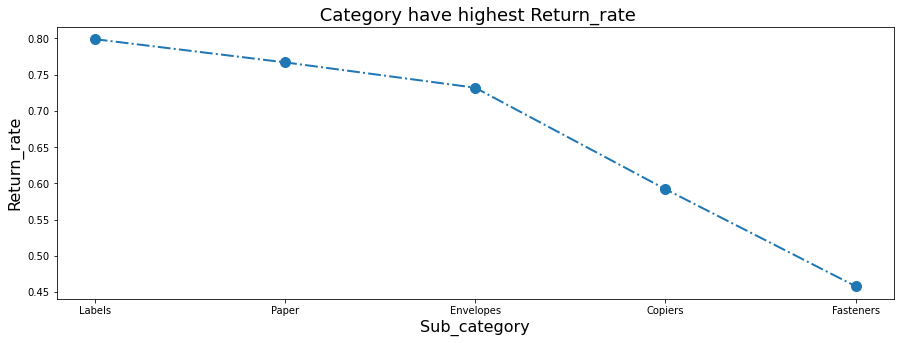

In [78]:
plt.figure(figsize=(15, 5))
plt.plot(cat['Sub-Category'], cat['return_rate'], marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Sub_category', fontsize=16)
plt.ylabel('Return_rate', fontsize=16)
plt.title(" Category have highest Return_rate", fontsize=18)

# **6. Which month of the year has the most orders?** 

In [ ]:

data_order = data_df.groupby(['year', 'month']).count()['Order ID']
years = data_order.index.get_level_values('year').unique().astype(str)
months = data_order.index.get_level_values('month').unique().astype(str)
data_order
   

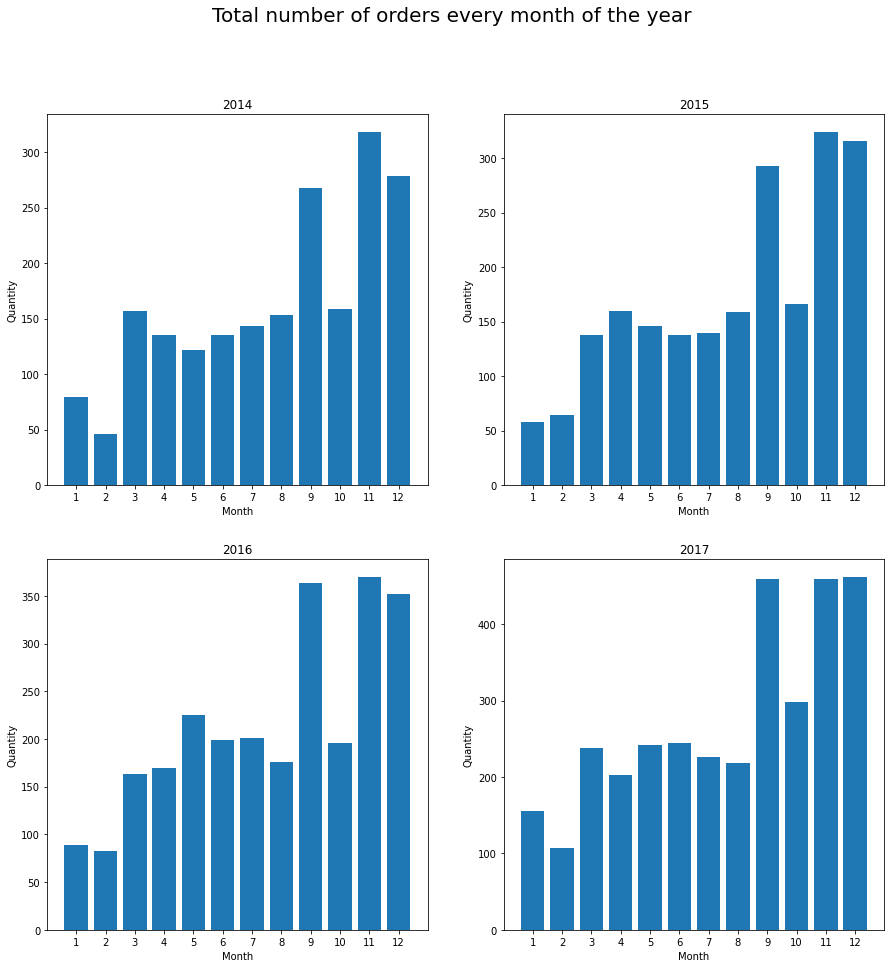

In [81]:
fig = plt.figure(figsize=(15,15))
for i, year in enumerate(years):
    ax = fig.add_subplot(2,2,i+1)
    ax.bar(months, data_order[data_order.index.get_level_values('year')==int(years[i])])
    ax.set_title(years[i])
    ax.set_xlabel('Month')
    ax.set_ylabel('Quantity')
fig.suptitle('Total number of orders every month of the year',fontsize=20)
plt.show()

Nhìn vào biểu đồ ta thấy, đa số những tháng cuối năm như tháng 9,11,12 thì như cầu mumua hàng tăng vượt trội so với các tháng còn lạilại

# **7. Top 10 best-selling products?**

In [ ]:
best_selling = data_df.groupby('Product Name')['Quantity'].sum().reset_index()
best_selling = best_selling.sort_values('Quantity', ascending = 0).head(10)
best_selling.iloc[:10, :]


,Product Name,Quantity
1499,Staples,215
1493,Staple envelope,170
537,Easy-staple paper,150
1500,Staples in misc. colors,86
942,KI Adjustable-Height Table,74
259,Avery Non-Stick Binders,71
1511,Storex Dura Pro Binders,71
699,GBC Premium Transparent Covers with Diagonal L...,67
1450,"Situations Contoured Folding Chairs, 4/Set",64
1497,Staple-based wall hangings,62


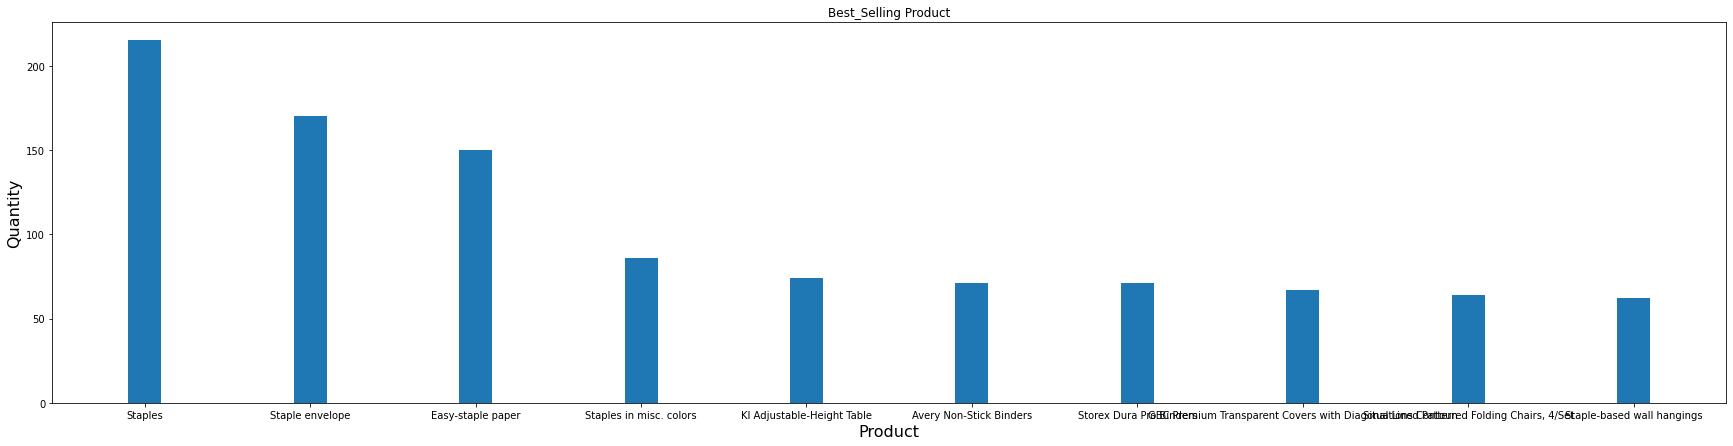

In [ ]:

plt.figure(figsize=(30,7))
plt.bar(best_selling['Product Name'], best_selling['Quantity'], width = 0.2)
        # , marker='o', markersize=10, linestyle='-.', linewidth=2)
plt.xlabel('Product', fontsize=16)
plt.ylabel('Quantity', fontsize=16)
plt.title("Best_Selling Product")
plt.show()

# **8. Which sub-category are usually sold together?**